In [279]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


In [280]:
file_id="CarRentalData.csv"
df=pd.read_csv(file_id)
col=df

## DATA SUMMARY

In [281]:
# Print basic information about the DataFrame 'df'
print("Dataframe shape:", df.shape)  #  (rows, columns)
print("Number of duplicate rows:", df.duplicated().sum())

# Creating a new DataFrame 'summary_table' to summarize data in 'df'
summary_table = pd.DataFrame({
    "Unique Values": df.nunique(),
    "Missing Values": df.isna().sum(),
    "Percent Missing": df.isna().sum() / len(df),
    "Data Type": df.dtypes.values
})

print("Summary of the data:")
display(summary_table)
df.drop_duplicates(inplace=True)

# Separating categorical and numerical parameters
cat = df.select_dtypes(include='O')
num = df.select_dtypes(exclude='O')

Dataframe shape: (5851, 15)
Number of duplicate rows: 0
Summary of the data:


,Unique Values,Missing Values,Percent Missing,Data Type
fuelType,4,75,0.012818,object
rating,80,501,0.085626,float64
renterTripsTaken,238,0,0.000000,int64
reviewCount,203,0,0.000000,int64
location.city,971,0,0.000000,object
location.country,1,0,0.000000,object
location.latitude,5839,0,0.000000,float64
location.longitude,5834,0,0.000000,float64
location.state,46,0,0.000000,object
owner.id,3093,0,0.000000,int64


In [282]:
num

,rating,renterTripsTaken,reviewCount,location.latitude,location.longitude,owner.id,rate.daily,vehicle.year
0,5.00,13,12,47.449107,-122.308841,12847615,135,2019
1,5.00,2,1,35.111060,-106.276551,15621242,190,2018
2,4.92,28,24,35.127163,-106.566681,10199256,35,2012
3,5.00,21,20,35.149726,-106.711425,9365496,75,2018
4,5.00,3,1,35.208659,-106.601008,3553565,47,2010
...,...,...,...,...,...,...,...,...
5846,5.00,32,27,21.292950,-157.836856,9794111,33,2017
5847,5.00,17,16,21.375507,-157.914919,2754690,49,2010
5848,4.94,18,17,21.378719,-157.727816,11313508,35,2013
5849,NaN,1,0,21.376105,-158.020237,4209883,77,2015


In [283]:
cat

,fuelType,location.city,location.country,location.state,vehicle.make,vehicle.model,vehicle.type
0,ELECTRIC,Seattle,US,WA,Tesla,Model X,suv
1,ELECTRIC,Tijeras,US,NM,Tesla,Model X,suv
2,HYBRID,Albuquerque,US,NM,Toyota,Prius,car
3,GASOLINE,Albuquerque,US,NM,Ford,Mustang,car
4,GASOLINE,Albuquerque,US,NM,Chrysler,Sebring,car
...,...,...,...,...,...,...,...
5846,GASOLINE,Honolulu,US,HI,Chevrolet,Cruze,car
5847,HYBRID,Aiea,US,HI,Lexus,HS 250h,car
5848,GASOLINE,Kailua,US,HI,smart,fortwo,car
5849,GASOLINE,Waipahu,US,HI,GMC,Savana,van


## CLEANING DATA

In [284]:

df.drop('location.country', axis=1, inplace=True)

df.dropna(inplace=True)

print('Missing values handled and "location.country" removed!')
print('Dataframe after cleaning:')


df

Missing values handled and "location.country" removed!
Dataframe after cleaning:


,fuelType,rating,renterTripsTaken,reviewCount,location.city,location.latitude,location.longitude,location.state,owner.id,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,47.449107,-122.308841,WA,12847615,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,35.111060,-106.276551,NM,15621242,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,35.127163,-106.566681,NM,10199256,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,35.149726,-106.711425,NM,9365496,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,35.208659,-106.601008,NM,3553565,47,Chrysler,Sebring,car,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,GASOLINE,5.00,2,2,Mililani,21.435401,-158.019400,HI,8836511,50,Nissan,Rogue,suv,2014
5846,GASOLINE,5.00,32,27,Honolulu,21.292950,-157.836856,HI,9794111,33,Chevrolet,Cruze,car,2017
5847,HYBRID,5.00,17,16,Aiea,21.375507,-157.914919,HI,2754690,49,Lexus,HS 250h,car,2010
5848,GASOLINE,4.94,18,17,Kailua,21.378719,-157.727816,HI,11313508,35,smart,fortwo,car,2013


<Axes: >

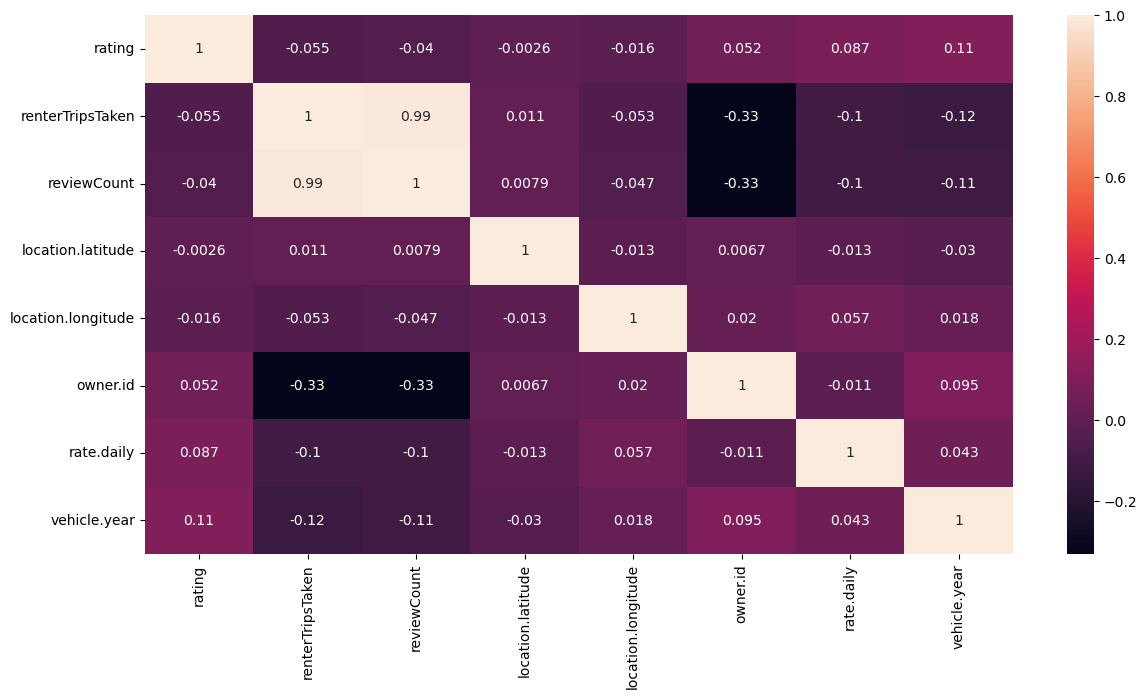

In [285]:
data=num
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(), annot=True)

In [286]:
columns_to_drop = ['location.latitude', 'location.longitude', 'location.state', 'owner.id']

# Drop the columns using a list(dropped beacuse does not affesct price )
df = df.drop(columns_to_drop, axis=1)

df

,fuelType,rating,renterTripsTaken,reviewCount,location.city,rate.daily,vehicle.make,vehicle.model,vehicle.type,vehicle.year
0,ELECTRIC,5.00,13,12,Seattle,135,Tesla,Model X,suv,2019
1,ELECTRIC,5.00,2,1,Tijeras,190,Tesla,Model X,suv,2018
2,HYBRID,4.92,28,24,Albuquerque,35,Toyota,Prius,car,2012
3,GASOLINE,5.00,21,20,Albuquerque,75,Ford,Mustang,car,2018
4,GASOLINE,5.00,3,1,Albuquerque,47,Chrysler,Sebring,car,2010
...,...,...,...,...,...,...,...,...,...,...
5845,GASOLINE,5.00,2,2,Mililani,50,Nissan,Rogue,suv,2014
5846,GASOLINE,5.00,32,27,Honolulu,33,Chevrolet,Cruze,car,2017
5847,HYBRID,5.00,17,16,Aiea,49,Lexus,HS 250h,car,2010
5848,GASOLINE,4.94,18,17,Kailua,35,smart,fortwo,car,2013


## LINER REGRESSION MODEL WITHOUT CLUSTERING

In [287]:
X = df.drop('rate.daily', axis=1)  # Features
y = df['rate.daily']  # Target variable

# One-hot encoding for categorical variables
categorical_cols = ['fuelType', 'location.city', 'vehicle.type', 'vehicle.model', 'vehicle.make']
numerical_cols = X.columns.difference(categorical_cols)

# Create a ColumnTransformer to apply one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Transforming the data into numerical entirely
X = preprocessor.fit_transform(X)
X

<5286x1445 sparse matrix of type '<class 'numpy.float64'>'
	with 47574 stored elements in Compressed Sparse Row format>

In [288]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Creating alinear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print('Model performance: ', model.score(X_test, y_test))

Model performance:  0.3985320482028273


## CLUSTERING

##  1)ON THE BASIS OF VEHICLE TYPE FEATURE

In [289]:
X = df  #.drop('rate.daily', axis=1)
y = df['rate.daily']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train_type = X_train.loc[:,['vehicle.type']]
categorical_cols = [ 'vehicle.type']


# Create a ColumnTransformer to apply one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Transforming the data into numerical entirely
X_train_type = preprocessor.fit_transform(X_train_type)


In [290]:
# Find optimal k for KMeans clustering using Davies Bouldin score and Elbow method

k_optimal = 1
db_min = 1000

inertia = {}
db = {}
for k in range(2,50):
    kmeans = KMeans(n_clusters=k, max_iter=100000, random_state=322)
    kmeans.fit(X_train_type)
    labels = kmeans.predict(X_train_type)

    inertia[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(X_train_type.toarray(), labels)
    
    if db[k] < db_min:
        db_min = db[k]
        k_optimal = k



In [291]:
 k_optimal

5

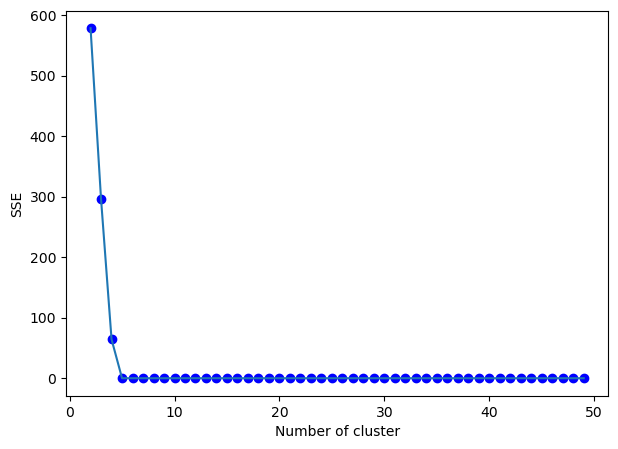

In [292]:
plt.figure(figsize=(7,5))
plt.plot(list(inertia.keys()), list(inertia.values()),'bo')
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

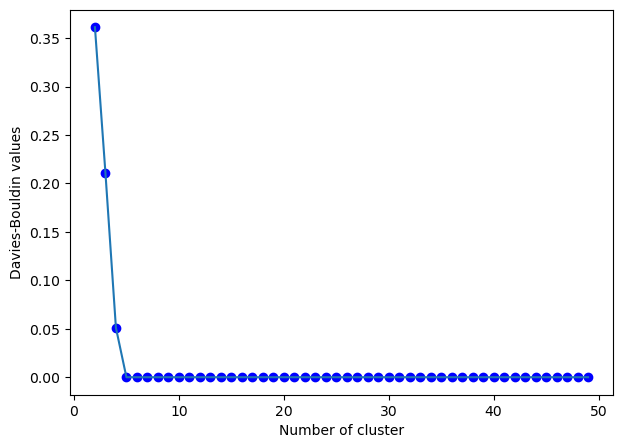

In [293]:
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'bo')
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [294]:
# Clustering into k_optimal vehicle types

kmeans = KMeans(n_clusters=k_optimal, max_iter=100000, random_state=322)
kmeans.fit(X_train_type)
labels = kmeans.predict(X_train_type)

# Adding cluster labels to each type
X_train['vehicle.type'] = labels

In [295]:
# Seperating types

types = []

for vehicletype in range(k_optimal):
    types.append(X_train[X_train['vehicle.type'] == vehicletype])

types

[      fuelType  rating  renterTripsTaken  reviewCount location.city  \
 3903  GASOLINE    5.00                 5            3    Scottsdale   
 4564  GASOLINE    4.71                19           14      Savannah   
 3195  GASOLINE    4.98                70           60   Los Angeles   
 1916  GASOLINE    4.92                55           48  Jacksonville   
 2545  GASOLINE    5.00                 5            5       Chicago   
 ...        ...     ...               ...          ...           ...   
 4017  GASOLINE    4.93               125          103       Raleigh   
 1183  GASOLINE    2.00                 1            1      Loveland   
 305   GASOLINE    4.66                43           32     Del Valle   
 1492  GASOLINE    4.91                42           35   Jersey City   
 447   GASOLINE    4.95                27           22       Seattle   
 
       rate.daily   vehicle.make      vehicle.model  vehicle.type  vehicle.year  
 3903         295  Mercedes-Benz            S-Class 

## LINEAR REGRESSION MODEL WITH ABOVE CLUSTERING

In [296]:
types_LR = []
types_LR_r2_score = []
for type_df in types:
        x = type_df.drop(['vehicle.type', 'rate.daily'], axis=1)  # Drop 'vehicle.type' and 'rate.daily' columns
        y = type_df['rate.daily']
categorical_cols = [ 'fuelType','location.city','vehicle.make','vehicle.model']
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')


x = preprocessor.fit_transform(x)



linear_reg = LinearRegression()
linear_reg.fit(x,y)
types_LR.append(linear_reg)

y_pred = linear_reg.predict(x)
types_LR_r2_score.append(r2_score(y, y_pred))

types_LR_r2_score

[0.9919058438731396]

## 2) ON THE BASIS OF FUEL TYPE FEATURE

In [297]:
X = df  #.drop('rate.daily', axis=1)
y = df['rate.daily']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train_ftype = X_train.loc[:,['fuelType']]
categorical_cols = [ 'fuelType']


# Create a ColumnTransformer to apply one-hot encoding
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# Transforming the data into numerical entirely
X_train_ftype = preprocessor.fit_transform(X_train_ftype)


In [298]:
k_optimal = 1
db_min = 1000

inertia = {}
db = {}
for k in range(2,50):
    kmeans = KMeans(n_clusters=k, max_iter=100000, random_state=322)
    kmeans.fit(X_train_ftype)
    labels = kmeans.predict(X_train_ftype)

    inertia[k] = kmeans.inertia_
    db[k] = davies_bouldin_score(X_train_ftype.toarray(), labels)
    
    if db[k] < db_min:
        db_min = db[k]
        k_optimal = k

print("k_optimal->",k_optimal)

k_optimal-> 4


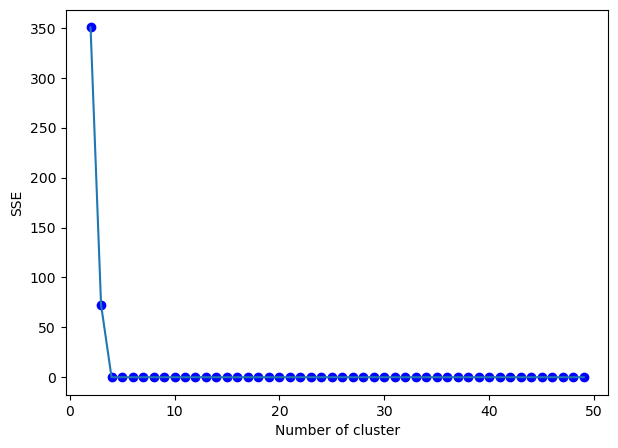

In [299]:
plt.figure(figsize=(7,5))
plt.plot(list(inertia.keys()), list(inertia.values()),'bo')
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


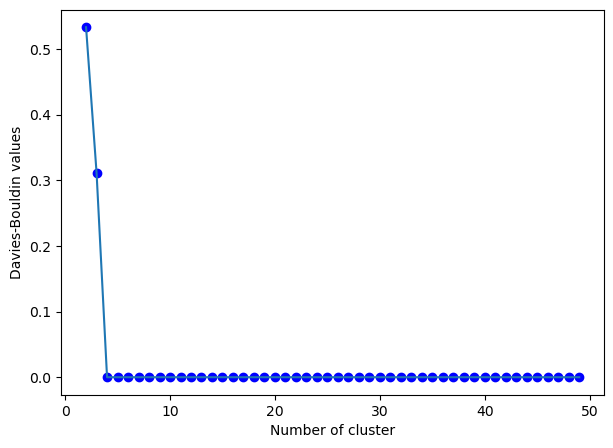

In [300]:
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'bo')
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()


In [301]:
kmeans = KMeans(n_clusters=k_optimal, max_iter=100000, random_state=322)
kmeans.fit(X_train_ftype)
labels = kmeans.predict(X_train_ftype)

# Adding cluster labels to each type
X_train['fuelType'] = labels


In [302]:
ftypes = []

for fuelType in range(k_optimal):
    ftypes.append(X_train[X_train['fuelType'] == fuelType])

ftypes

[      fuelType  rating  renterTripsTaken  reviewCount  location.city  \
 3903         0    5.00                 5            3     Scottsdale   
 4564         0    4.71                19           14       Savannah   
 3195         0    4.98                70           60    Los Angeles   
 344          0    5.00                16           14         Austin   
 1916         0    4.92                55           48   Jacksonville   
 ...        ...     ...               ...          ...            ...   
 3117         0    5.00                 1            1          Azusa   
 1492         0    4.91                42           35    Jersey City   
 447          0    4.95                27           22        Seattle   
 2430         0    4.97                38           35        Orlando   
 2971         0    4.82                30           28  Castro Valley   
 
       rate.daily   vehicle.make vehicle.model vehicle.type  vehicle.year  
 3903         295  Mercedes-Benz       S-Class

## LINEAR REGRESSION MODEL WITH ABOVE CLUSTERING

In [304]:
ftypes_LR = []
ftypes_LR_r2_score = []
for ftype_df in types1:
        x = ftype_df.drop(['fuelType', 'rate.daily'], axis=1)  
        y = ftype_df['rate.daily']
categorical_cols = [ 'vehicle.type','location.city','vehicle.make','vehicle.model']
preprocessor = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), categorical_cols)
], remainder='passthrough')


x = preprocessor.fit_transform(x)


    
linear_reg = LinearRegression()
linear_reg.fit(x,y)
ftypes_LR.append(linear_reg)

y_pred = linear_reg.predict(x)
ftypes_LR_r2_score.append(r2_score(y, y_pred))

ftypes_LR_r2_score

[0.9999999695676514]